# Time Series Prediction 

This notebook will be dedicated to stock price prediction 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
# OS
from pathlib import Path
import os

In [11]:

folder_path = "stock-price-predictions/price/"
chosen_company = "AAPL"
dataframes = {}

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dataframes[filename[:-4]] = df

for name, df in dataframes.items():
    print(f"Loaded {name}: {df.shape}")


Loaded AAPL: (1258, 7)
Loaded ABB: (1258, 7)
Loaded ABBV: (1177, 7)
Loaded AEP: (1258, 7)
Loaded AGFS: (701, 7)
Loaded AMGN: (1258, 7)
Loaded AMZN: (1258, 7)
Loaded BA: (1258, 7)
Loaded BABA: (745, 7)
Loaded BAC: (1258, 7)
Loaded BBL: (1258, 7)
Loaded BCH: (1258, 7)
Loaded BHP: (1258, 7)
Loaded BP: (1258, 7)
Loaded BRK-A: (1258, 7)
Loaded BSAC: (1258, 7)
Loaded BUD: (1258, 7)
Loaded C: (1258, 7)
Loaded CAT: (1258, 7)
Loaded CELG: (1258, 7)
Loaded CHL: (1258, 7)
Loaded CHTR: (1258, 7)
Loaded CMCSA: (1258, 7)
Loaded CODI: (1258, 7)
Loaded CSCO: (1258, 7)
Loaded CVX: (1258, 7)
Loaded D: (1258, 7)
Loaded DHR: (1258, 7)
Loaded DIS: (1258, 7)
Loaded DUK: (1258, 7)
Loaded EXC: (1258, 7)
Loaded FB: (1258, 7)
Loaded GD: (1258, 7)
Loaded GE: (1258, 7)
Loaded GMRE: (297, 7)
Loaded GOOG: (1258, 7)
Loaded HD: (1258, 7)
Loaded HON: (1258, 7)
Loaded HRG: (1258, 7)
Loaded HSBC: (1258, 7)
Loaded IEP: (1258, 7)
Loaded INTC: (1258, 7)
Loaded JNJ: (1258, 7)
Loaded JPM: (1258, 7)
Loaded KO: (1258, 7)
Loade

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-09-04,27.327276,27.606695,27.243450,27.578754,21.952684,13438500
1,2012-09-05,27.653267,27.755720,27.476299,27.606695,21.974926,6460300
2,2012-09-06,27.392473,27.392473,27.150311,27.206194,21.922386,5406200
3,2012-09-07,27.252764,27.336590,27.140995,27.234137,21.944904,2729500
4,2012-09-10,27.327276,27.327276,27.131681,27.131681,21.862347,2729300
...,...,...,...,...,...,...,...
1253,2017-08-28,39.610001,39.680000,39.299999,39.529999,39.529999,2119900
1254,2017-08-29,39.590000,39.650002,39.360001,39.380001,39.380001,1443900
1255,2017-08-30,39.270000,39.419998,39.110001,39.180000,39.180000,1825100
1256,2017-08-31,39.259998,39.320000,39.169998,39.240002,39.240002,2086200


In [10]:

folder_path = 'stock-price-predictions/price/'

volatility_dict = {}

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        if {'High', 'Low', 'Close'}.issubset(df.columns):
            df['Volatility'] = df['Close'].std()
            avg_volatility = df['Volatility'].mean()
            volatility_dict[filename[:-4]] = avg_volatility

sorted_volatility = sorted(volatility_dict.items(), key=lambda x: x[1], reverse=True)

for stock, vol in sorted_volatility:
    print(f"{stock}: {vol:.5f}")


BRK-A: 33823.27304
PCLN: 327.81740
AMZN: 234.49625
GOOG: 164.42096
CHTR: 78.33777
LMT: 59.73121
FB: 40.25637
UNH: 39.06597
GD: 38.67045
BA: 32.94518
MMM: 30.64895
HD: 28.84244
AMGN: 28.15103
CELG: 26.96468
PTR: 26.80493
AAPL: 25.76712
REX: 24.39223
IEP: 22.96054
BABA: 22.57322
MA: 21.00870
NEE: 20.34242
DIS: 20.00740
HON: 18.97971
V: 17.69743
MCD: 17.38828
BHP: 17.21948
JNJ: 16.08153
BBL: 15.64786
MDT: 13.76360
MO: 13.69414
TM: 13.36761
SRE: 13.07403
DHR: 13.01577
JPM: 12.94966
PEP: 12.76380
CVX: 12.45644
MSFT: 12.43517
BUD: 12.42005
CAT: 11.85779
UTX: 11.68321
NVS: 11.23771
SLB: 11.16909
RDS-B: 11.07431
UPS: 10.79303
PM: 10.19438
SNP: 9.77833
BCH: 9.61492
ABBV: 9.12106
PCG: 8.74342
AEP: 8.54496
D: 7.69747
HSBC: 7.56990
C: 7.20688
WFC: 6.91445
XOM: 6.81195
TOT: 6.78000
NGG: 6.67582
MRK: 6.57171
DUK: 6.35012
CMCSA: 5.96339
PG: 5.92297
WMT: 5.91624
BP: 5.89641
TSM: 5.66369
CHL: 5.40105
INTC: 5.37458
PICO: 5.10775
SNY: 4.92004
UN: 4.85781
ORCL: 4.52742
UL: 4.38881
CSCO: 4.06528
BAC: 3.776

In [90]:
aapl_data = None
for filename in os.listdir(folder_path):
    if filename.endswith('.csv') and 'AAPL' in filename: #CHANGE FOR AAPL!!!!
        aapl_data = pd.read_csv(os.path.join(folder_path, filename))
        aapl_data['pct'] = (aapl_data['Close'] - aapl_data['Open']) / aapl_data['Open'] * 100
        break

In [91]:
# Merging sentiment analysis 

file_path = 'stock-price-predictions/tweet/AAPL/daily_tweet_sentiment.csv' #CHANGE TO AAPL!!!!
sentiment = pd.read_csv(file_path)

stock_senti = aapl_data.merge(sentiment, how = 'left', left_on='Date', right_on='day')
stock_senti

,Date,Open,High,Low,Close,Adj Close,Volume,pct,day,sentiment_number
0,2012-09-04,95.108574,96.448570,94.928574,96.424286,87.121140,91973000,1.383379,NaN,NaN
1,2012-09-05,96.510002,96.621429,95.657143,95.747147,86.509338,84093800,-0.790441,NaN,NaN
2,2012-09-06,96.167145,96.898575,95.828575,96.610001,87.288956,97799100,0.460507,NaN,NaN
3,2012-09-07,96.864288,97.497147,96.538574,97.205711,87.827171,82416600,0.352476,NaN,NaN
4,2012-09-10,97.207146,97.612854,94.585716,94.677139,85.542564,121999500,-2.602697,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1253,2017-08-28,160.139999,162.000000,159.929993,161.470001,161.470001,25966000,0.830525,NaN,NaN
1254,2017-08-29,160.100006,163.119995,160.000000,162.910004,162.910004,29516900,1.755152,NaN,NaN
1255,2017-08-30,163.800003,163.889999,162.610001,163.350006,163.350006,27269600,-0.274723,NaN,NaN
1256,2017-08-31,163.639999,164.520004,163.479996,164.000000,164.000000,26785100,0.219996,NaN,NaN


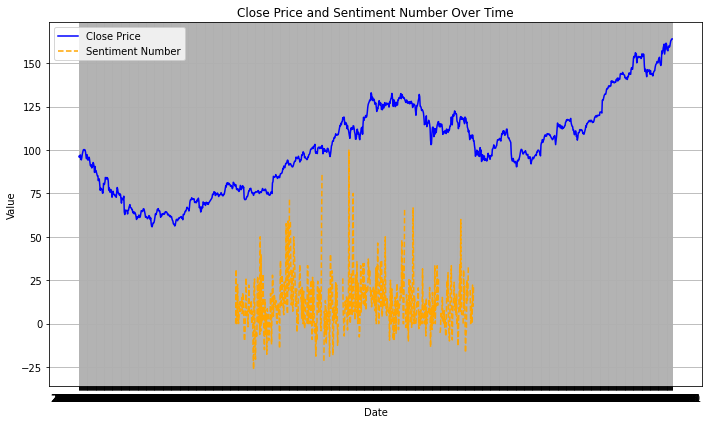

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the Close Price and Sentiment Number
plt.figure(figsize=(10, 6))

# Plot Close Price
plt.plot(stock_senti['Date'], stock_senti['Close'], label='Close Price', color='blue')

# Plot Sentiment Number
plt.plot(stock_senti['Date'], stock_senti['sentiment_number']*100, label='Sentiment Number', color='orange', linestyle='--')

# Add labels and title
plt.title('Close Price and Sentiment Number Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [186]:
# Looking at the condensed time frame 

stock_senti_filter = stock_senti.dropna(subset=['sentiment_number'])
stock_senti_filter


,Date,Open,High,Low,Close,Adj Close,Volume,pct,day,sentiment_number
332,2013-12-31,79.167145,80.182854,79.142860,80.145714,74.571281,55771100,1.236080,2013-12-31,0.000000
333,2014-01-02,79.382858,79.575714,78.860001,79.018570,73.522530,58671200,-0.458900,2014-01-02,0.312500
334,2014-01-03,78.980003,79.099998,77.204285,77.282860,71.907555,98116900,-2.148826,2014-01-03,0.000000
335,2014-01-06,76.778572,78.114288,76.228569,77.704285,72.299644,103152700,1.205692,2014-01-06,0.043478
336,2014-01-07,77.760002,77.994286,76.845711,77.148575,71.782608,79302300,-0.786300,2014-01-07,0.225806
...,...,...,...,...,...,...,...,...,...,...
832,2015-12-24,109.000000,109.000000,107.949997,108.029999,104.380112,13570400,-0.889909,2015-12-24,0.105263
833,2015-12-28,107.589996,107.690002,106.180000,106.820000,103.210999,26704200,-0.715676,2015-12-28,0.000000
834,2015-12-29,106.959999,109.430000,106.860001,108.739998,105.066116,30931200,1.664173,2015-12-29,0.222222
835,2015-12-30,108.580002,108.699997,107.180000,107.320000,103.694107,25213800,-1.160437,2015-12-30,0.100000


In [106]:

stock_senti_filter['sentiment_number'].corr(stock_senti_filter['pct'])


,Open,High,Low,Close,Adj Close,Volume,pct,day,sentiment_number
Date,,,,,,,,,
2013-12-31,79.167145,80.182854,79.142860,80.145714,74.571281,55771100,1.236080,2013-12-31,0.000000
2014-01-02,79.382858,79.575714,78.860001,79.018570,73.522530,58671200,-0.458900,2014-01-02,0.312500
2014-01-03,78.980003,79.099998,77.204285,77.282860,71.907555,98116900,-2.148826,2014-01-03,0.000000
2014-01-06,76.778572,78.114288,76.228569,77.704285,72.299644,103152700,1.205692,2014-01-06,0.043478
2014-01-07,77.760002,77.994286,76.845711,77.148575,71.782608,79302300,-0.786300,2014-01-07,0.225806
...,...,...,...,...,...,...,...,...,...
2015-12-24,109.000000,109.000000,107.949997,108.029999,104.380112,13570400,-0.889909,2015-12-24,0.105263
2015-12-28,107.589996,107.690002,106.180000,106.820000,103.210999,26704200,-0.715676,2015-12-28,0.000000
2015-12-29,106.959999,109.430000,106.860001,108.739998,105.066116,30931200,1.664173,2015-12-29,0.222222


In [251]:
# ARIMA Model 

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

stock_senti_filter['Date'] = pd.to_datetime(stock_senti_filter['Date'])
#stock_senti_filter.set_index('Date', inplace=True)
train_data = stock_senti_filter['Close'][-30:]
last_30_days = stock_senti_filter['Close'].tail(30)


# Fit the ARIMA model (p, d, q). These values should be tuned.
# p: number of lag observations (AR term)
# d: number of times the series needs to be differenced to become stationary
# q: size of the moving average window
model = sm.tsa.ARIMA(last_30_days, order=(5, 1, 0))  # Here, p=5, d=1, q=0
model_fit = model.fit()

# Forecast the next 7 days
forecast = model_fit.forecast(steps=7)

# Print forecast
print("Next 7 days forecasted prices:")
forecast

<ipython-input-251-cfcbfb6aaa7a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_senti_filter['Date'] = pd.to_datetime(stock_senti_filter['Date'])
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'stat

Next 7 days forecasted prices:


(array([104.35133706, 104.82608911, 103.58100982, 103.13293977,
        103.09576723, 103.3169305 , 102.60048249]),
 array([1.45647956, 2.19609836, 2.86045378, 3.3879401 , 4.07871052,
        4.49710182, 4.87965689]),
 array([[101.49668958, 107.20598453],
        [100.52181541, 109.13036281],
        [ 97.97462343, 109.18739622],
        [ 96.4926992 , 109.77318034],
        [ 95.10164152, 111.08989295],
        [ 94.5027729 , 112.1310881 ],
        [ 93.03653072, 112.16443425]]))

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

predictions = pd.DataFrame(columns=['Date', 'Predicted_Close'])

window_size = 30
forecast_steps = 7

i = window_size
while i <= len(stock_senti_filter) - forecast_steps:
    # Get the 30-day window of data for training the model
    train_data = stock_senti_filter['Close'].iloc[i - window_size:i]
    
    # Fit the ARIMA model (you may adjust the order parameters as needed)
    model = statsmodels.tsa.arima.model.ARIMA(train_data, order=(5, 1, 0))
    model_fit = model.fit()
    
    # Forecast the next 7 days
    forecast = model_fit.forecast(steps=forecast_steps)
    
    # Create a date range for the forecasted values
    forecast_dates = pd.date_range(start=stock_senti_filter.iloc[i, 0], periods=forecast_steps)
    
    # Create a temporary DataFrame for the forecasted values
    temp_predictions = pd.DataFrame({
        'Date': forecast_dates,
        'Predicted_Close': forecast
    })
    
    # Append the temporary DataFrame to the predictions DataFrame
    predictions = pd.concat([predictions, temp_predictions], ignore_index=True)
    
    # Store the predictions in the DataFrame
    #for j in range(forecast_steps):
        #predictions = predictions.append({'Date': forecast_dates[j], 'Predicted_Close': forecast.iloc[j]}, ignore_index=True)

    i += forecast_steps




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


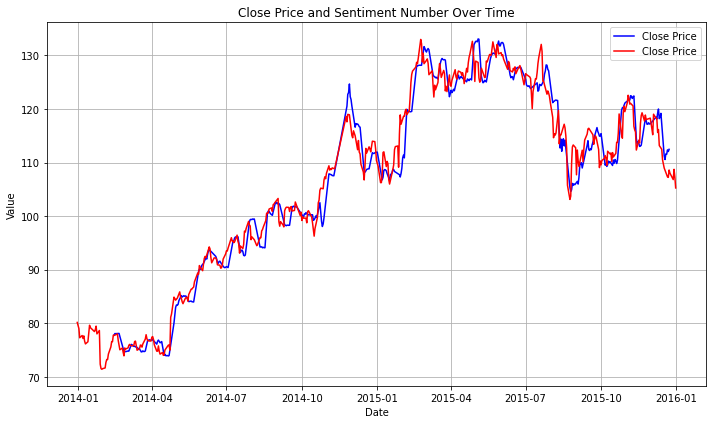

In [279]:
plt.figure(figsize=(10, 6))

stock_senti_filter['Date'] = pd.to_datetime(stock_senti_filter['Date'])
predictions['Date'] = pd.to_datetime(predictions['Date'])
pred_merge = stock_senti_filter.merge(predictions, on="Date")

# Plot Predicted Close Price
plt.plot(predictions['Date'], predictions['Predicted_Close'], label='Close Price', color='blue')

# Plot Actualized Close Price 
plt.plot(stock_senti_filter['Date'], stock_senti_filter['Close'], label='Close Price', color='red')

# Add labels and title
plt.title('Close Price and Sentiment Number Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [247]:
pred_merge

,Date,Open,High,Low,Close,Adj Close,Volume,pct,day,sentiment_number,Predicted_Close
0,2014-02-14,77.495712,77.997147,77.315712,77.712860,72.740463,68231100,0.280206,2014-02-14,0.058824,77.835747
1,2014-02-18,78.000000,78.741432,77.944283,77.998573,73.007904,65062900,-0.001829,2014-02-18,0.060606,78.075545
2,2014-02-19,77.821426,78.127144,76.335716,76.767143,71.855263,78442000,-1.354746,2014-02-19,0.133333,78.085380
3,2014-02-20,76.141426,76.714287,75.571426,75.878571,71.023521,76464500,-0.345219,2014-02-20,0.000000,78.090774
4,2014-02-26,74.801430,75.000000,73.657143,73.907143,69.178246,69054300,-1.195548,2014-02-26,-0.263158,74.710817
...,...,...,...,...,...,...,...,...,...,...,...
296,2015-12-11,115.190002,115.389999,112.849998,113.180000,109.356125,46886200,-1.744945,2015-12-11,0.133333,118.205451
297,2015-12-17,112.019997,112.250000,108.980003,108.980003,105.298019,44772800,-2.713796,2015-12-17,0.000000,111.237113
298,2015-12-21,107.279999,107.370003,105.570000,107.330002,103.703766,47590600,0.046610,2015-12-21,0.193548,112.370535
299,2015-12-22,107.400002,107.720001,106.449997,107.230003,103.607155,32789400,-0.158286,2015-12-22,0.000000,112.067636


In [260]:
# Computing the performance of the ARIMA model

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(pred_merge['Close'], pred_merge['Predicted_Close']))
print(round(rmse, 2))

3.07


# Building the multimodal model

In [264]:
# Importing the necessary packages
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import shap

RMSE: 3.84


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

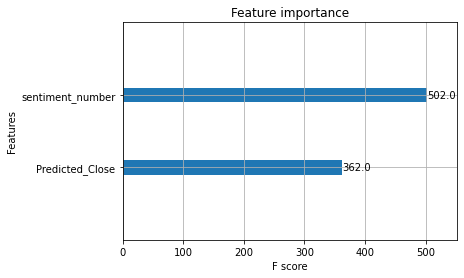

In [284]:
# Defining x and y
X = pred_merge[['Predicted_Close', 'sentiment_number']]
y = pred_merge['Close']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Placing the data into matricies
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # This is for regression
    'eval_metric': 'rmse',
    'max_depth': 6,
    'learning_rate': 0.1,
    'colsample_bytree': 0.3,
    'subsample': 0.8,
    'alpha': 10
}

# Train the XGBoost model
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=100)

# Make predictions
y_pred = xgb_model.predict(test_dmatrix)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {round(rmse, 2)}")

# You can also view feature importance
xgb.plot_importance(xgb_model)

RMSE: 1.58


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

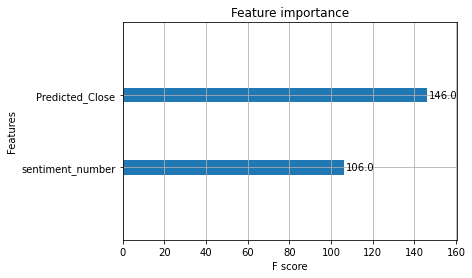

In [289]:
# Defining x and y
X = pred_merge[['Predicted_Close', 'sentiment_number']]
y = pred_merge['pct']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Placing the data into matricies
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # This is for regression
    'eval_metric': 'rmse',
    'max_depth': 6,
    'learning_rate': 0.1,
    'colsample_bytree': 0.3,
    'subsample': 0.8,
    'alpha': 10
}

# Train the XGBoost model
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=100)

# Make predictions
y_pred = xgb_model.predict(test_dmatrix)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {round(rmse, 2)}")

# You can also view feature importance
xgb.plot_importance(xgb_model)

In [282]:
# Switching to XGB classification on price direction 

from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create binary labels for price movement (up/down)
# We'll say 1 if the price increased from the previous day, and 0 if it decreased or stayed the same
pred_merge_bin = pred_merge
pred_merge_bin['Price_Change'] = pred_merge_bin['Close'].diff().shift(-1)  # Check price difference from one day to the next
pred_merge_bin['Price_Direction'] = np.where(pred_merge_bin['Price_Change'] > 0, 1, 0)  # 1 for up, 0 for down

# Drop any rows with NaN values (e.g., last row because of shift(-1))
pred_merge_bin.dropna(subset=['Price_Direction'], inplace=True)

# Step 2: Define features (X) and target (y)
X = pred_merge_bin[['Predicted_Close', 'sentiment_number']]
y = pred_merge_bin['Price_Direction']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = xgb_clf.predict(X_test)

# Step 6: Evaluate classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Step 7: Classification report (gives precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.4262
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.25      0.29        28
           1       0.47      0.58      0.52        33

    accuracy                           0.43        61
   macro avg       0.40      0.41      0.40        61
weighted avg       0.41      0.43      0.41        61



[21:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



In [281]:
pred_merge_bin

,Date,Open,High,Low,Close,Adj Close,Volume,pct,day,sentiment_number,Predicted_Close,Price_Change,Price_Direction
0,2014-02-14,77.495712,77.997147,77.315712,77.712860,72.740463,68231100,0.280206,2014-02-14,0.058824,77.835747,0.285713,1
1,2014-02-18,78.000000,78.741432,77.944283,77.998573,73.007904,65062900,-0.001829,2014-02-18,0.060606,78.075545,-1.231430,0
2,2014-02-19,77.821426,78.127144,76.335716,76.767143,71.855263,78442000,-1.354746,2014-02-19,0.133333,78.085380,-0.888572,0
3,2014-02-20,76.141426,76.714287,75.571426,75.878571,71.023521,76464500,-0.345219,2014-02-20,0.000000,78.090774,-1.971428,0
4,2014-02-26,74.801430,75.000000,73.657143,73.907143,69.178246,69054300,-1.195548,2014-02-26,-0.263158,74.710817,1.474289,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2015-12-11,115.190002,115.389999,112.849998,113.180000,109.356125,46886200,-1.744945,2015-12-11,0.133333,118.205451,-4.199997,0
297,2015-12-17,112.019997,112.250000,108.980003,108.980003,105.298019,44772800,-2.713796,2015-12-17,0.000000,111.237113,-1.650001,0
298,2015-12-21,107.279999,107.370003,105.570000,107.330002,103.703766,47590600,0.046610,2015-12-21,0.193548,112.370535,-0.099999,0
299,2015-12-22,107.400002,107.720001,106.449997,107.230003,103.607155,32789400,-0.158286,2015-12-22,0.000000,112.067636,1.379998,1


# Fine Tuning XGBoost on Close Prediction Task

In [ ]:
# Fine tuning XGBoost

import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Step 1: Define X and y
X = pred_merge[['Predicted_Close', 'sentiment_number']]
y = pred_merge['Close']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create an XGBoost DMatrix
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Step 4: Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'alpha': [0, 1, 5, 10],
}

# Step 5: Set up the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Step 6: Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Step 7: Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Step 8: Retrieve the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Step 9: Make predictions with the best model
y_pred = best_model.predict(X_test)

# Step 10: Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Best Parameters: {best_params}")
print(f"RMSE: {round(rmse, 2)}")

# Optional: Plot feature importance for the best model
xgb.plot_importance(best_model)


Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


# Fine Tuning XGBoost on PCT Prediction Task

In [ ]:
# Step 1: Define X and y
X = pred_merge[['Predicted_Close', 'sentiment_number']]
y = pred_merge['pct']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create an XGBoost DMatrix
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Step 4: Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'alpha': [0, 1, 5, 10],
}

# Step 5: Set up the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Step 6: Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Step 7: Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Step 8: Retrieve the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Step 9: Make predictions with the best model
y_pred = best_model.predict(X_test)

# Step 10: Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Best Parameters: {best_params}")
print(f"RMSE: {round(rmse, 2)}")

# Optional: Plot feature importance for the best model
xgb.plot_importance(best_model)
